# Task 1: Feature Selection
In this task, you will explore the given features and select the most relevant ones for predicting the target variable (median_value_of_home(1000s_dollars)). Use the following steps to complete this task:


## 1.1 Load the dataset and split it into train and test sets (70% for training and 30% for testing).

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive/')
path = '/content/drive/My Drive/BADM 576/Extra Credit/Housing Dataset/'

df = pd.read_csv(path+"home_price-1.csv")

Mounted at /content/drive/


In [2]:
df.head()

,per_capita_crime_rate,proportion_large_lots,proportion_non_retail_business,by_river,nitric_oxide_concentration,avg_no_of_rooms_per_home,proportion_old_homes,avg_distance_from_downtown,highway_access_index,property_tax_per_10k,pupil_teacher_ratio,percentage_lower_status_population,median_value_of_home(1000s_dollars)
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [3]:
df = df.rename(columns={"median_value_of_home(1000s_dollars)":"median_value_of_home"})

In [4]:
df.columns

Index(['per_capita_crime_rate', 'proportion_large_lots',
       'proportion_non_retail_business', 'by_river',
       'nitric_oxide_concentration', 'avg_no_of_rooms_per_home',
       'proportion_old_homes', 'avg_distance_from_downtown',
       'highway_access_index', 'property_tax_per_10k', 'pupil_teacher_ratio',
       'percentage_lower_status_population', 'median_value_of_home'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = "median_value_of_home")
y = df.median_value_of_home

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((354, 12), (354,), (152, 12), (152,))

## 1.2 Use correlation matrix and scatter plots to visualise the relationship between each feature and the target variable.

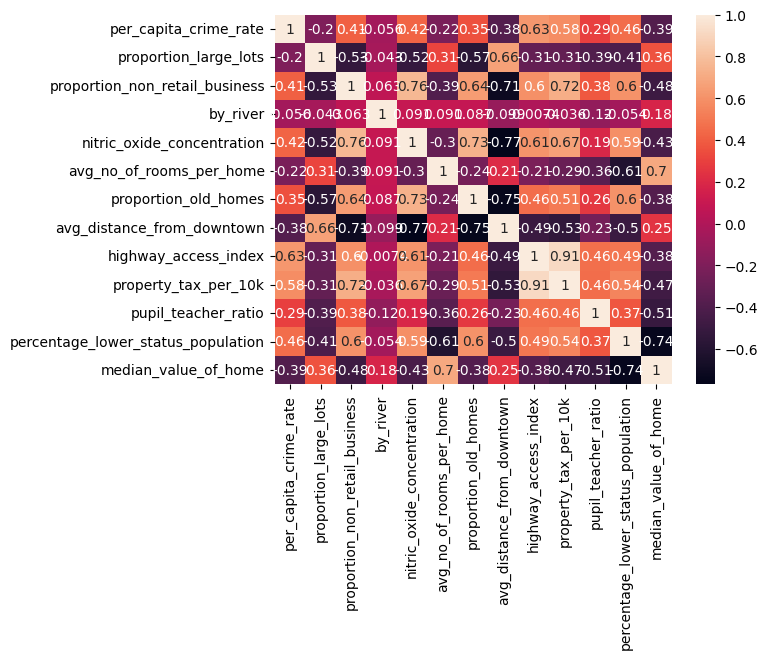

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

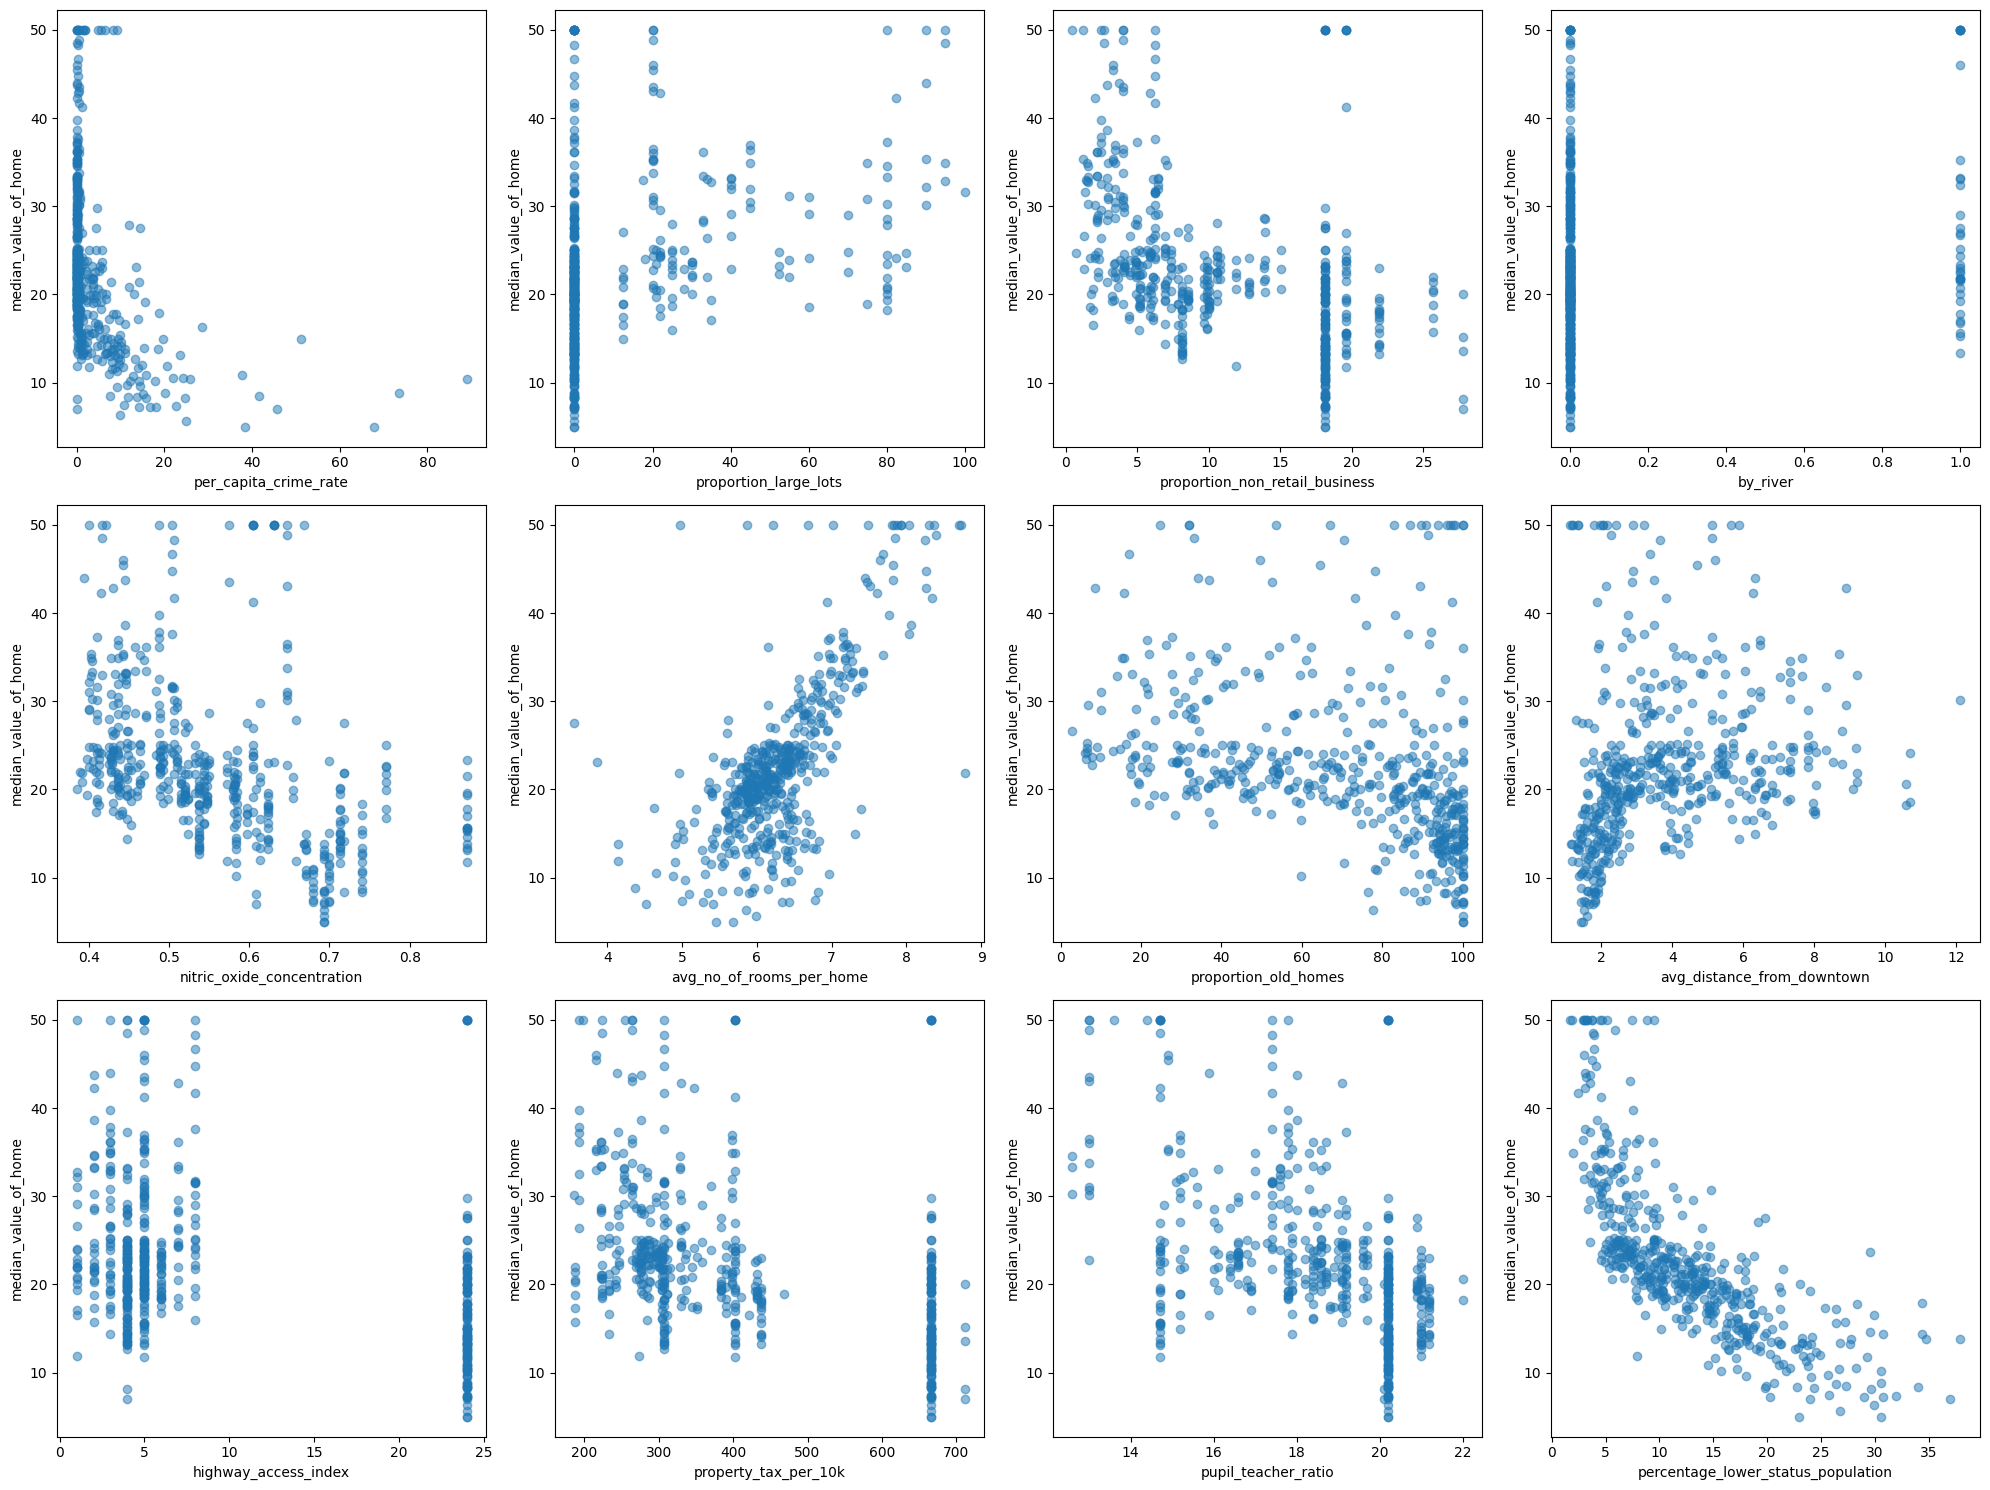

In [9]:
# Create subplots for each feature
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
axs = axs.flatten()

# Loop over each feature and plot against the target variable
for i, col in enumerate(df.columns):
    if col != 'median_value_of_home':
        axs[i].scatter(df[col], df['median_value_of_home'], alpha=0.5)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('median_value_of_home')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## 1.3 Based on your observations, select the top 5 most relevant features and create a new dataset with only these features.

In [10]:
abs(corr_matrix['median_value_of_home']).nlargest(6)[1:]

percentage_lower_status_population    0.737663
avg_no_of_rooms_per_home              0.695360
pupil_teacher_ratio                   0.507787
proportion_non_retail_business        0.483725
property_tax_per_10k                  0.468536
Name: median_value_of_home, dtype: float64

In [11]:
df_new = df[["median_value_of_home","percentage_lower_status_population","avg_no_of_rooms_per_home","pupil_teacher_ratio","proportion_non_retail_business","property_tax_per_10k"]]

## 1.4 Split the new dataset into train and test sets.

In [12]:
X_new = df_new.drop(columns = "median_value_of_home")
y_new = df_new.median_value_of_home

In [13]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [14]:
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((354, 5), (152, 5), (354,), (152,))

# Task 2: Linear Regression
In this task, you will apply Linear Regression on the selected features and evaluate its performance on the test dataset. Use the following steps to complete this task:

## 2.1 Train a Linear Regression model on the train dataset.


In [15]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train_new, y_train_new) 

LinearRegression()

## 2.2 Evaluate the performance of the model on the train and test datasets using Mean Squared Error (MSE) and R-squared score.

In [16]:
y_pred= model.predict(X_test_new)

In [17]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test_new, y_pred))

26.08602170404518


In [18]:
from sklearn.metrics import r2_score
print(r2_score(y_test_new, y_pred))

0.6499135956539901


## 2.3 Plot the predicted values vs the actual values for the test dataset to visualize the performance of the model.

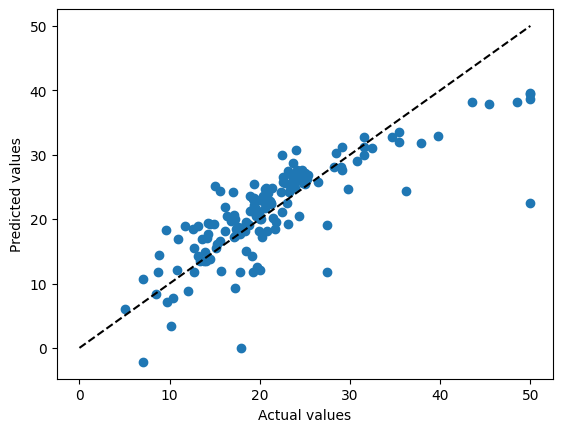

In [19]:
plt.scatter(y_test_new, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# Task 3: Regularization
In this task, you will apply L1 and L2 regularization to prevent overfitting and improve the performance of the Linear Regression model. Use the following steps to complete this task:


## 3.1 Train a Ridge Regression model with L2 regularization on the train dataset and evaluate its performance on the test dataset using MSE and R-squared score.


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [21]:
# Create pipeline
l2_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(random_state=42))
])

In [22]:
l2_pipe.fit(X_train_new, y_train_new)

# Evaluate pipeline on test set
y_pred_l2 = l2_pipe.predict(X_test_new)

In [23]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test_new, y_pred_l2))
from sklearn.metrics import r2_score
print(r2_score(y_test_new, y_pred_l2))

26.058482156604267
0.6502831890419849


## 3.2 Train a Lasso Regression model with L1 regularization on the train dataset and evaluate its performance on the test dataset using MSE and R-squared score.

In [24]:
from sklearn.linear_model import Lasso
# Create pipeline
l1_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso(random_state=42))
])

In [25]:
l1_pipe.fit(X_train_new, y_train_new)

# Evaluate pipeline on test set
y_pred_l1 = l1_pipe.predict(X_test_new)

In [26]:
print(metrics.mean_squared_error(y_test_new, y_pred_l1))
print(r2_score(y_test_new, y_pred_l1))

26.953097941185337
0.638277033912297


## 3.3 Compare the performance of the Ridge and Lasso Regression models with the Linear Regression model.

* Linear: MSE= 26.0860, R-squared=0.6499
* Ridge(L2): MSE= 26.0585, R-squared=0.6503
* Lasso(L1): MSE= 26.9531, R-squared=0.6383

In summary, the **Ridge Regression** model performs the best on the test set, with the lowest MSE and highest R-squared score. The Linear Regression model has a slightly higher MSE and lower R-squared score, while the Lasso Regression model performs the worst with the highest MSE and lowest R-squared score. 

# Task 4: Grid Search
In this task, you will use GridSearchCV to find the best value of lambda for both Ridge and Lasso Regression models. Use the following steps to complete this task:


## 4.1 Define a range of values for lambda.


In [27]:
# Range of lambda values to test
ridge_param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100] 
}
lasso_param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]  
}

## 4.2 Use GridSearchCV to find the best value of lambda for Ridge and Lasso Regression models.


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
# Ridge Regression
ridge_grid = GridSearchCV(l2_pipe, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_new, y_train_new)
# Print the best lambda value and the corresponding MSE for Ridge Regression
print("Best lambda for Ridge Regression: ", ridge_grid.best_params_)
print("MSE for Ridge Regression: ", -ridge_grid.best_score_)

Best lambda for Ridge Regression:  {'ridge__alpha': 10}
MSE for Ridge Regression:  29.282432543695315


In [30]:
# Lasso Regression
lasso_grid = GridSearchCV(l1_pipe, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_new, y_train_new)
# Print the best lambda value and the corresponding MSE for Lasso Regression
print("Best lambda for Lasso Regression: ", lasso_grid.best_params_)
print("MSE for Lasso Regression: ", -lasso_grid.best_score_)

Best lambda for Lasso Regression:  {'lasso__alpha': 0.001}
MSE for Lasso Regression:  29.34145827845278


## 4.3 Train the Ridge and Lasso Regression models with the best values of lambda and evaluate their performance on the test dataset using MSE and R-squared score.

In [31]:
# Fit the Ridge model with the best hyperparameters
ridge_best = ridge_grid.best_estimator_
ridge_best.fit(X_train_new, y_train_new)

# Evaluate pipeline on test set
y_pred_ridge = ridge_best.predict(X_test_new)

In [32]:
print(metrics.mean_squared_error(y_test_new, y_pred_ridge))
print(r2_score(y_test_new, y_pred_ridge))

25.84502063478816
0.6531479408039311


In [33]:
# Fit the Lasso model with the best hyperparameters
lasso_best = lasso_grid.best_estimator_
lasso_best.fit(X_train_new, y_train_new)

# Evaluate pipeline on test set
y_pred_lasso = lasso_best.predict(X_test_new)

In [34]:
print(metrics.mean_squared_error(y_test_new, y_pred_lasso))
print(r2_score(y_test_new, y_pred_lasso))

26.083330899460268
0.64994970748862


## 4.4 Compare the performance of the Ridge and Lasso Regression models with the Linear Regression model.

* Linear: MSE= 26.0860, R-squared=0.6499
* Ridge(L2): MSE= 25.8450, R-squared=0.6531
* Lasso(L1): MSE= 26.0833, R-squared=0.6499

In summary, the **Ridge Regression** model performs the best on the test set, with the lowest MSE and highest R-squared score. The Lasso Regression model has a slightly higher MSE and lower R-squared score, while the Linear Regression model has a similar MSE and R-squared score as the Lasso Regression model.